In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, KFold
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, mean_squared_error
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import r2_score, confusion_matrix, classification_report
import joblib

from sklearn.base import BaseEstimator, TransformerMixin

### Load the dataset

In [2]:
df1 = pd.read_csv('csv_files/train_loan.csv')
df2 = pd.read_csv('csv_files/test_loan.csv')

### Check the first five dataset

In [3]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


### Check Datatype for Column

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


### Check the statistical summary

In [7]:
df1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df2.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


### Check for the number of Rows and Columns

In [9]:
print('Total Number of Row: {}'.format(df1.shape[0]))
print('Total Number of Shape: {}'.format(df1.shape[1]))

Total Number of Row: 614
Total Number of Shape: 13


In [10]:
print('Total Number of Row: {}'.format(df2.shape[0]))
print('Total Number of Shape: {}'.format(df2.shape[1]))

Total Number of Row: 367
Total Number of Shape: 12


### Check the Missing Values

In [11]:
df1.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
df2.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

#### Check the Percentage of Missing Values

In [13]:
(df1.isnull().sum() * 100)/ len(df1)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [14]:
(df2.isnull().sum() * 100)/ len(df2)

Loan_ID              0.000000
Gender               2.997275
Married              0.000000
Dependents           2.724796
Education            0.000000
Self_Employed        6.267030
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           1.362398
Loan_Amount_Term     1.634877
Credit_History       7.901907
Property_Area        0.000000
dtype: float64

### Drop the columns with missing data less than 5%

train dataset

In [15]:
column = ['Loan_ID', 'Gender', 'Dependents', 'LoanAmount', 'Loan_Amount_Term']

In [16]:
df1 = df1.dropna(subset=column)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 553 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            553 non-null    object 
 1   Gender             553 non-null    object 
 2   Married            553 non-null    object 
 3   Dependents         553 non-null    object 
 4   Education          553 non-null    object 
 5   Self_Employed      523 non-null    object 
 6   ApplicantIncome    553 non-null    int64  
 7   CoapplicantIncome  553 non-null    float64
 8   LoanAmount         553 non-null    float64
 9   Loan_Amount_Term   553 non-null    float64
 10  Credit_History     505 non-null    float64
 11  Property_Area      553 non-null    object 
 12  Loan_Status        553 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 60.5+ KB


In [17]:
df2 = df2.dropna(subset=column)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 337 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            337 non-null    object 
 1   Gender             337 non-null    object 
 2   Married            337 non-null    object 
 3   Dependents         337 non-null    object 
 4   Education          337 non-null    object 
 5   Self_Employed      314 non-null    object 
 6   ApplicantIncome    337 non-null    int64  
 7   CoapplicantIncome  337 non-null    int64  
 8   LoanAmount         337 non-null    float64
 9   Loan_Amount_Term   337 non-null    float64
 10  Credit_History     311 non-null    float64
 11  Property_Area      337 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.2+ KB


### Replace columns with missing data greater 5% with mode

In [18]:
df1['Self_Employed'].value_counts()

Self_Employed
No     451
Yes     72
Name: count, dtype: int64

In [19]:
df1['Credit_History'].value_counts()

Credit_History
1.0    434
0.0     71
Name: count, dtype: int64

In [20]:
df1['Self_Employed'] = df1['Self_Employed'].fillna(df1['Self_Employed'].mode()[0])
df1['Credit_History'] = df1['Credit_History'].fillna(df1['Credit_History'].mode()[0])

In [21]:
(df1.isnull().sum() * 100)/ len(df1)

Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

In [22]:
df2['Self_Employed'] = df2['Self_Employed'].fillna(df2['Self_Employed'].mode()[0])
df2['Credit_History'] = df2['Credit_History'].fillna(df2['Credit_History'].mode()[0])

In [23]:
(df2.isnull().sum() * 100)/ len(df2)

Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
dtype: float64

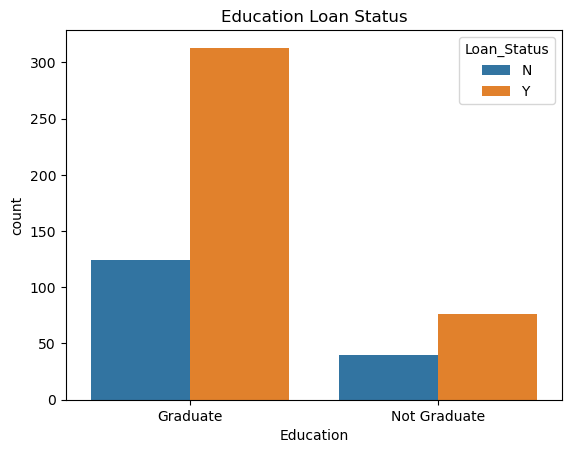

In [24]:
sns.countplot(x= 'Education', hue='Loan_Status', data=df1)
plt.title('Education Loan Status')
plt.show()

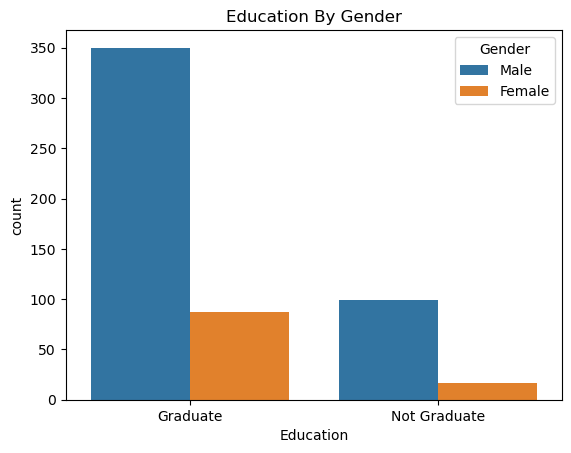

In [25]:
sns.countplot(x= 'Education', hue='Gender', data=df1)
plt.title('Education By Gender')
plt.show()

In [26]:
df1['Loan_Status'].value_counts()

Loan_Status
Y    389
N    164
Name: count, dtype: int64

### Convert categorical columns to numerical data

In [27]:
df1.head(12)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
10,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y


In [28]:
df1['Dependents'].unique()

array(['1', '0', '2', '3+'], dtype=object)

#### Replace 3+ with 3

In [29]:
df1['Dependents'] = df1['Dependents'].replace(to_replace='3+', value='3')
df1['Dependents'].unique()

array(['1', '0', '2', '3'], dtype=object)

In [30]:
df2['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [31]:
df2['Dependents'] = df2['Dependents'].replace(to_replace='3+', value='3')
df2['Dependents'].unique()

array(['0', '1', '2', '3'], dtype=object)

In [32]:
print('Gender:',df1['Gender'].unique())
print('Maried:',df1['Married'].unique())
print('Education:',df1['Education'].unique())
print('Self Employed:',df1['Self_Employed'].unique())
print('Property Area:',df1['Property_Area'].unique())
print('Loan Status:',df1['Loan_Status'].unique())

Gender: ['Male' 'Female']
Maried: ['Yes' 'No']
Education: ['Graduate' 'Not Graduate']
Self Employed: ['No' 'Yes']
Property Area: ['Rural' 'Urban' 'Semiurban']
Loan Status: ['N' 'Y']


In [33]:
df1['Gender'] = df1['Gender'].map({'Male': 1, 'Female': 0}).astype('int')
df1['Married'] = df1['Married'].map({'Yes': 1, 'No': 0}).astype('int')
df1['Education'] = df1['Education'].map({'Graduate': 1, 'Not Graduate': 0}).astype('int')
df1['Self_Employed'] = df1['Self_Employed'].map({'Yes': 1, 'No': 0}).astype('int')
df1['Property_Area'] = df1['Property_Area'].map({'Urban': 1, 'Rural': 0, 'Semiurban': 2}).astype('int')
df1['Loan_Status'] = df1['Loan_Status'].map({'Y': 1, 'N': 0}).astype('int')

In [34]:
df1.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents            object
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [35]:
#df1['Dependents'] = df1['Dependents'].map({'0': 0, '1': 1, '2': 2, '3': 3}).astype('int')


In [36]:
labelencoder= LabelEncoder() #initializing an object of class LabelEncoder
df1['Dependents'] = labelencoder.fit_transform(df1['Dependents']) #fitting and transforming the desired categorical column.

In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 553 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            553 non-null    object 
 1   Gender             553 non-null    int32  
 2   Married            553 non-null    int32  
 3   Dependents         553 non-null    int32  
 4   Education          553 non-null    int32  
 5   Self_Employed      553 non-null    int32  
 6   ApplicantIncome    553 non-null    int64  
 7   CoapplicantIncome  553 non-null    float64
 8   LoanAmount         553 non-null    float64
 9   Loan_Amount_Term   553 non-null    float64
 10  Credit_History     553 non-null    float64
 11  Property_Area      553 non-null    int32  
 12  Loan_Status        553 non-null    int32  
dtypes: float64(4), int32(7), int64(1), object(1)
memory usage: 45.4+ KB


In [38]:
print('Gender:',df2['Gender'].unique())
print('Maried:',df2['Married'].unique())
print('Education:',df2['Education'].unique())
print('Self Employed:',df2['Self_Employed'].unique())
print('Property Area:',df2['Property_Area'].unique())
#print('Loan Status:',df2['Loan_Status'].unique())

Gender: ['Male' 'Female']
Maried: ['Yes' 'No']
Education: ['Graduate' 'Not Graduate']
Self Employed: ['No' 'Yes']
Property Area: ['Urban' 'Semiurban' 'Rural']


In [39]:
df2['Gender'] = df2['Gender'].map({'Male': 1, 'Female': 0}).astype('int')
df2['Married'] = df2['Married'].map({'Yes': 1, 'No': 0}).astype('int')
df2['Education'] = df2['Education'].map({'Graduate': 1, 'Not Graduate': 0}).astype('int')
df2['Self_Employed'] = df2['Self_Employed'].map({'Yes': 1, 'No': 0}).astype('int')
df2['Property_Area'] = df2['Property_Area'].map({'Urban': 1, 'Rural': 0, 'Semiurban': 2}).astype('int')
#df1['Loan_Status'] = df1['Loan_Status'].map({'Y': 1, 'N': 0}).astype('int')

In [40]:
df2.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents            object
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
dtype: object

In [41]:
labelencoder= LabelEncoder() #initializing an object of class LabelEncoder
df2['Dependents'] = labelencoder.fit_transform(df2['Dependents']) #fitting and transforming the desired categorical column.

In [42]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 337 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            337 non-null    object 
 1   Gender             337 non-null    int32  
 2   Married            337 non-null    int32  
 3   Dependents         337 non-null    int32  
 4   Education          337 non-null    int32  
 5   Self_Employed      337 non-null    int32  
 6   ApplicantIncome    337 non-null    int64  
 7   CoapplicantIncome  337 non-null    int64  
 8   LoanAmount         337 non-null    float64
 9   Loan_Amount_Term   337 non-null    float64
 10  Credit_History     337 non-null    float64
 11  Property_Area      337 non-null    int32  
dtypes: float64(3), int32(6), int64(2), object(1)
memory usage: 26.3+ KB


#### Drop Load ID column

In [43]:
df1.drop('Loan_ID', axis=1, inplace=True)
df2.drop('Loan_ID', axis=1, inplace=True)

In [44]:
df1.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [45]:
df2.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

#### Train the model

In [46]:
X = df1.drop('Loan_Status', axis=1)

In [47]:
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

#### Target value

In [48]:
y = df1['Loan_Status']

In [49]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1


In [50]:
y.head()

1    0
2    1
3    1
4    1
5    1
Name: Loan_Status, dtype: int32

#### Split the data into training and test sets

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [52]:
print(f"Train size: {round(len(X_train) / len(X) * 100)}% \nTest size: {round(len(X_test) / len(X) * 100)}%")

Train size: 80% 
Test size: 20%


#### Feature Scaling

In [53]:
scaler = StandardScaler()

In [54]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [55]:
logreg = LogisticRegression()

In [56]:
logreg.fit(X_train, y_train)

C:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [57]:
y_pred = logreg.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy: {}'.format(acc))

Accuracy: 0.7927927927927928


In [58]:
logreg.fit(scaled_X_train, y_train)

LogisticRegression()

In [59]:
y_scaled_pred = logreg.predict(scaled_X_test)
scaled_acc = accuracy_score(y_test, y_scaled_pred)
print('Accuracy: {}'.format(scaled_acc))

Accuracy: 0.8018018018018018


In [60]:
#Initialized the models
models = {
    'Linear Regression': LinearRegression(),
    'LogisticRegression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB()
}

In [61]:
# Dictionary to store the results
results = {}

# Fit the models and evaluate
for name, model in models.items():
    model.fit(scaled_X_train, y_train) # Train the model
    y_pred = model.predict(scaled_X_test) # Predict on the test set
    
    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[name] = {'MSE': mse, 'R^2 Score': r2}

# Print the results
for model_name, metrics in results.items():
    print('{} - MSE: {}, R^2 Score: {}'.format(model_name, metrics['MSE'], metrics['R^2 Score']))
    #print('{} Means Squared Error: {}'.format(model, mean_squared_error(y_test, y_pred)))
    #print('{} Accuracy Result: {}'.format(model, accuracy_score(y_test, y_pred)))


Linear Regression - MSE: 0.18440836934485746, R^2 Score: 0.13212547032162392
LogisticRegression - MSE: 0.1981981981981982, R^2 Score: 0.06722689075630262
Decision Tree - MSE: 0.25225225225225223, R^2 Score: -0.18716577540106938
KNN - MSE: 0.24324324324324326, R^2 Score: -0.14476699770817403
SVM - MSE: 0.1981981981981982, R^2 Score: 0.06722689075630262
Naive Bayes - MSE: 0.17117117117117117, R^2 Score: 0.19442322383498856


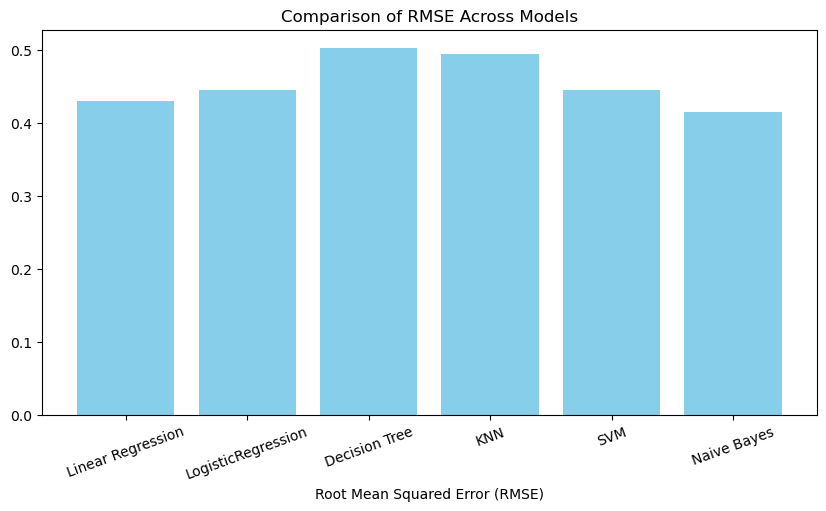

In [62]:
# Calculate RMSE for each model from the stored MSE and prepare for plotting
rmse_values = [sqrt(metrics['MSE']) for metrics in results.values()]
model_names = list(results.keys())

# Create a horizontal bar graph for RMSE
plt.figure(figsize=(10, 5))
plt.bar(model_names, rmse_values, color='skyblue')
plt.xlabel('Root Mean Squared Error (RMSE)')
plt.xticks(rotation=20)
plt.title('Comparison of RMSE Across Models')
plt.show()

### Perform Serialization and Deserialization

In [63]:
joblib.dump(logreg, 'loan_model.pkl')

['loan_model.pkl']

In [64]:
#Deserialzation
final_model = joblib.load('loan_model.pkl')

In [65]:
final_model

LogisticRegression()

In [66]:
final_model.intercept_, final_model.coef_

(array([0.99941159]),
 array([[-0.08841937,  0.36362466, -0.0055652 ,  0.07963684,  0.19812059,
          0.06060165,  0.16295354, -0.27271638, -0.14469754,  1.18808472,
          0.37185754]]))

In [67]:
logreg.intercept_, logreg.coef_

(array([0.99941159]),
 array([[-0.08841937,  0.36362466, -0.0055652 ,  0.07963684,  0.19812059,
          0.06060165,  0.16295354, -0.27271638, -0.14469754,  1.18808472,
          0.37185754]]))

In [68]:
print(final_model.intercept_ == logreg.intercept_)

[ True]


In [69]:
print(final_model.coef_ == logreg.coef_)

[[ True  True  True  True  True  True  True  True  True  True  True]]


In [70]:
import PackageA

In [71]:
from PackageA import f2

In [72]:
#f1.result()

In [73]:
f2.f2()

'Result from f2'

In [74]:
from PackageA import f1
f1.result()

'Result from f1'

In [75]:
from PackageA.SubPackageA import f3
f3.f3()

'Result from f3'

In [76]:
import sys
sys.path

['C:\\Users\\Saheed\\Desktop\\Machine_Learning_Project',
 'C:\\anaconda\\python311.zip',
 'C:\\anaconda\\DLLs',
 'C:\\anaconda\\Lib',
 'C:\\anaconda',
 '',
 'C:\\anaconda\\Lib\\site-packages',
 'C:\\anaconda\\Lib\\site-packages\\win32',
 'C:\\anaconda\\Lib\\site-packages\\win32\\lib',
 'C:\\anaconda\\Lib\\site-packages\\Pythonwin']

In [77]:
PackageA.__file__

'C:\\Users\\Saheed\\Desktop\\Machine_Learning_Project\\PackageA\\__init__.py'

In [78]:
import pathlib
pathlib.Path(PackageA.__file__).resolve().parent

WindowsPath('C:/Users/Saheed/Desktop/Machine_Learning_Project/PackageA')

### Create Custom Data Transformers

* Inherit -> BaseEstimator, TransformerMixin
* Implement fit and transform
* Accept input with **____init____()** method

In [79]:
class CustomTransfomer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X

In [80]:
#Numerical Imputation - mean
class MeanImputer(BaseEstimator, TransformerMixin):
    def __init__(self, variables=None):
        self.variables = variables
        
    def fit(self, X, y=None):
        self.mean_dict = {}
        for col in self.variables:
            self.mean_dict[col] = X[col].mean()
        return self
    
    def transform(self, X):
        X = X.copy()
        for col in self.variables:
            X[col].fillna(self.mean_dict[col], inplace=True)
        return X

In [81]:
np.random.seed(10)
df = pd.DataFrame(np.random.randint(0, 100, (10, 2)), columns=['A', 'B'])
df.iloc[1, 0] = np.nan
df.iloc[2, 1] = np.nan
df.iloc[3, 1] = np.nan
df.iloc[4, 0] = np.nan
df.iloc[5, 1] = np.nan
df

,A,B
0,9.0,15.0
1,NaN,28.0
2,89.0,NaN
3,29.0,NaN
4,NaN,0.0
5,40.0,NaN
6,16.0,11.0
7,54.0,88.0
8,62.0,33.0
9,72.0,78.0


In [82]:
mean_imputer = MeanImputer(variables=['A', 'B'])

In [83]:
mean_imputer.fit(df)

MeanImputer(variables=['A', 'B'])

In [84]:
mean_imputer.mean_dict

{'A': 46.375, 'B': 36.142857142857146}

In [85]:
df.mean()

A    46.375000
B    36.142857
dtype: float64

In [86]:
mean_imputer.transform(df)

,A,B
0,9.000,15.000000
1,46.375,28.000000
2,89.000,36.142857
3,29.000,36.142857
4,46.375,0.000000
5,40.000,36.142857
6,16.000,11.000000
7,54.000,88.000000
8,62.000,33.000000
9,72.000,78.000000


In [87]:
np.__version__

'1.26.4'

In [88]:
pd.__version__

'2.0.3'

In [89]:
joblib.__version__

'1.2.0'

In [92]:
import sklearn
sklearn.__version__

'1.3.0'

In [93]:
import scipy
scipy.__version__

'1.11.1'

In [94]:
import setuptools
setuptools.__version__

'68.0.0'

In [95]:
import wheel
wheel.__version__

'0.38.4'